# Hotspot Analysis Results

In [2]:
import hotspot
from itertools import groupby
from json import load
import pandas as pd
import scanpy as sc
import numpy as np
import sys
sys.path.insert(1, '/Users/greencode/Documents/Coding/Analysis-of-scRNA-Sequencing-Data')
import modules.GO.geneOntology as GOAnalysis
import os
import math
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pickle
import random
import gseapy as gp
pd.set_option('display.max_columns', None)

In [2]:
!pip3 list 

Package                       Version
----------------------------- -----------
alabaster                     0.7.13
anndata                       0.8.0
annoy                         1.17.1
anyio                         3.6.2
appdirs                       1.4.4
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
asttokens                     2.2.1
attrs                         22.2.0
Babel                         2.11.0
backcall                      0.2.0
bbknn                         1.5.1
beautifulsoup4                4.11.2
bleach                        6.0.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
comm                          0.1.2
contourpy                     1.0.7
cycler                        0.11.0
Cython                        0.29.33
data

In [3]:
significantGenes = list(pd.read_csv("./significantGenes-padj<0.05.csv")["x"])
significantGenes

['TNC',
 'AMBN',
 'VIM',
 'FABP7',
 'CLIC1',
 'HMGN3',
 'TTYH1',
 'HES1',
 'ZFP36L1',
 'GAS1',
 'SLC9A3R1',
 'OAF',
 'TTR',
 'AL049637.2',
 'FAM89A',
 'LEF1',
 'DMRT3',
 'CCND1',
 'ADAMTSL1',
 'MYO1E',
 'ITGA2',
 'ADAMTS18',
 'AL627171.2',
 'PLCE1',
 'MIR222HG',
 'LIMCH1',
 'ID4',
 'B3GAT2',
 'ZNRF3',
 'CACHD1',
 'SIPA1L1',
 'GPR39',
 'LYPD6B',
 'TENM4',
 'RASGRP1',
 'LHX2',
 'DMRTA2',
 'COL24A1',
 'AL137139.2',
 'AC023886.1',
 'WNT7B',
 'EGFR',
 'AK5',
 'GCHFR',
 'KHDRBS3',
 'TPBG',
 'CTSC',
 'DYRK4',
 'NCALD',
 'LGALS3BP',
 'FILIP1',
 'SCUBE1',
 'MFSD3',
 'C2orf81',
 'CCDC85C',
 'SCRG1',
 'RCAN2',
 'RCAN1',
 'GRK5',
 'CHST9',
 'TRIM67',
 'PROX1',
 'PAUPAR',
 'ZNF558',
 'ARHGAP25',
 'PCDHB5',
 'DLK1',
 'ZBTB16',
 'DNAJC15',
 'UNC5C',
 'OLFM3',
 'PRKG2',
 'AC124854.1',
 'RBMS1',
 'AC093298.2',
 'AC012409.2',
 'RNF220',
 'SFMBT2',
 'RAB11FIP2',
 'SORCS2',
 'CARMIL1',
 'TRAF3',
 'AC109927.1',
 'PLCL1',
 'AC027288.3',
 'MCM3AP',
 'AL031985.4',
 'AC108134.2',
 'WDR49',
 'RHBDF2',
 'CHCHD2'

In [4]:
HSA21genesDataframe = pd.read_csv("./HSA21_genes_biomaRt_conversion.csv")
HSA21genes = [x for x in HSA21genesDataframe["hgnc_symbol"] if str(x) != 'nan']
HSA21genes

['PRDM15',
 'PFKL',
 'HUNK',
 'COL6A1',
 'IFNAR1',
 'SOD1',
 'COL6A2',
 'SIK1',
 'DNMT3L',
 'TRPM2',
 'TMEM50B',
 'APP',
 'DOP1B',
 'URB1',
 'CXADR',
 'BTG3',
 'C21orf91',
 'CHODL',
 'TMPRSS15',
 'NCAM2',
 'MRPL39',
 'JAM2',
 'ATP5PF',
 'GABPA',
 'ADAMTS1',
 'ADAMTS5',
 'HSPA13',
 'SAMSN1',
 'USP25',
 'N6AMT1',
 'RWDD2B',
 'USP16',
 'CCT8',
 'MAP3K7CL',
 'BACH1',
 'CLDN17',
 'CLDN8',
 'TIAM1',
 'SCAF4',
 'VPS26C',
 'DYRK1A',
 'KCNJ6',
 'KCNJ15',
 'ERG',
 'ETS2',
 'LCA5L',
 'MX1',
 'C2CD2',
 'MIS18A',
 'CFAP298',
 'SYNJ1',
 'PAXBP1',
 'IFNAR2',
 'IFNGR2',
 'GART',
 'SON',
 'DONSON',
 'KCNE2',
 'RCAN1',
 'CLIC6',
 'RUNX1',
 'CBR1',
 'CBR3',
 'MORC3',
 'CHAF1B',
 'CLDN14',
 'SIM2',
 'HLCS',
 'ABCG1',
 'TFF3',
 'TFF2',
 'TFF1',
 'TMPRSS3',
 'UBASH3A',
 'RSPH1',
 'SLC37A1',
 'PDE9A',
 'WDR4',
 'NDUFV3',
 'PKNOX1',
 'CBS',
 'U2AF1',
 'CRYAA',
 'HSF2BP',
 'RRP1B',
 'PDXK',
 'CSTB',
 'RRP1',
 'AGPAT3',
 'TRAPPC10',
 'GATD3A',
 'ICOSLG',
 'AIRE',
 'CFAP410',
 'LRRC3',
 'ITGB2',
 'SLX9',
 'FTCD'

In [5]:
genesInSignificant = 0
significantHSA21genes = []

for gene in significantGenes:
    if gene in HSA21genes:
        genesInSignificant +=1
        significantHSA21genes.append(gene)

print(genesInSignificant)
significantHSA21genes

28


['RCAN1',
 'MCM3AP',
 'TIAM1',
 'DOP1B',
 'TTC3',
 'PRMT2',
 'GET1',
 'HSPA13',
 'RRP1B',
 'ATP5PF',
 'CCT8',
 'HMGN1',
 'SYNJ1',
 'ITSN1',
 'CRYZL1',
 'PDE9A',
 'PAXBP1',
 'MORC3',
 'DYRK1A',
 'HLCS',
 'LSS',
 'APP',
 'PKNOX1',
 'BRWD1',
 'IFNAR2',
 'GART',
 'DONSON',
 'GATD3A']

## Hotspot Plot Local Correlations

In [6]:
# Import Pickel Objects
with open('./hotspotObjectSignificantGenes28Feb.pkl', 'rb') as inp:
    hs = pickle.load(inp)

In [7]:
print(len(significantGenes))
hs.compute_local_correlations(significantGenes)

355
Computing pair-wise local correlation on 355 features...


100%|██████████| 62835/62835 [03:16<00:00, 319.31it/s]


,TNC,AMBN,VIM,FABP7,CLIC1,HMGN3,TTYH1,HES1,ZFP36L1,GAS1,SLC9A3R1,OAF,TTR,AL049637.2,FAM89A,LEF1,DMRT3,CCND1,ADAMTSL1,MYO1E,ITGA2,ADAMTS18,AL627171.2,PLCE1,MIR222HG,LIMCH1,ID4,B3GAT2,ZNRF3,CACHD1,SIPA1L1,GPR39,LYPD6B,TENM4,RASGRP1,LHX2,DMRTA2,COL24A1,AL137139.2,AC023886.1,WNT7B,EGFR,AK5,GCHFR,KHDRBS3,TPBG,CTSC,DYRK4,NCALD,LGALS3BP,FILIP1,SCUBE1,MFSD3,C2orf81,CCDC85C,SCRG1,RCAN2,RCAN1,GRK5,CHST9,TRIM67,PROX1,PAUPAR,ZNF558,ARHGAP25,PCDHB5,DLK1,ZBTB16,DNAJC15,UNC5C,OLFM3,PRKG2,AC124854.1,RBMS1,AC093298.2,AC012409.2,RNF220,SFMBT2,RAB11FIP2,SORCS2,CARMIL1,TRAF3,AC109927.1,PLCL1,AC027288.3,MCM3AP,AL031985.4,AC108134.2,WDR49,RHBDF2,CHCHD2,LHX1,LHX5-AS1,LHX5,EOMES,LINC02609,SLC17A6,SST,GRIK3,SERTAD4,SEZ6,GAD1,RPP25,SP9,DLX6,FGD3,SHTN1,MGAT5B,SNTG1,ENOX1,ASTN1,TIAM1,AC034111.2,ENO4,BICDL1,GABRB3,SVOP,MTMR7,DCLK1,UNC79,LRRN3,SYT14,MTSS1,SRRM4,AFAP1,DOP1B,LINC00599,SCRT1,AC011900.1,KCNH7,SRGAP1,AC020611.2,IGSF9B,EPHB1,TNIK,NRXN1,POU2F2,RAB3C,SYT1,ASXL3,PAK5,SCN3A,APBA1,AKAP6,STXBP5L,DGKI,GNG12-AS1,ERBB4,KCNMB2,KCNMB2-AS1,KCNJ3,SH3RF3,KIRREL3,PCDH7,DSCAML1,KSR2,XKR4,CPEB3,SYT16,DNM3,CACNG2,CACNG8,SCN3B,MAPT,PHACTR3,NMNAT2,RUNX1T1,CNTN5,CNNM1,LRRC4C,AL445433.2,LHFPL3,SORCS3,RMST,AC019197.1,PLEKHA6,CAMKV,LINC02223,LRFN5,LHFPL4,ST18,INSM1,LZTS1-AS1,UBE2QL1,DLL3,LZTS1,ELAVL2,GNAO1,TAOK3,KIFAP3,REEP1,AMER2,CDK5R1,DPF1,TMEM35A,RIMKLA,HSPA12A,STMN2,ATP1A3,ACTL6B,INA,SCG3,RTN1,TTC9B,THRA,OCIAD2,PRKCZ,SEZ6L2,PDP1,TTC3,PRMT2,WSB2,GET1,PPP1R18,PARP6,ADGRG1,DYNC1I2,DPYSL2,EXOC5,GNG4,CCZ1,HSPA13,RRP1B,ATP5PF,CCT8,HMGN1,PFN2,RAB3IP,KIF21B,BSN,SEPTIN3,CRMP1,KLC1,CELSR3,KIF3C,GNG2,CD24,MLLT11,RTN2,GDAP1L1,NCAN,ACAP3,KIAA0408,MACO1,CEP170,MTMR6,CORO7,ELAVL4,ATCAY,ELAVL3,SOX4,MYT1,CORO2B,ARHGEF2,TMEM169,MAP1A,CXXC5,GTF2H2,NR2F1,ISOC2,HMGA1,EIF3L,RPL7L1,FAM92A,RNF7,ANAPC16,SINHCAF,GTPBP6,OARD1,EIF5A,IFI27L2,RPL12,EEF1B2,RPL18,RPS8,RPL5,RPLP0,RPL13,RPL18A,RPS3,RPL17,UBE2S,RND3,ARL4D,RORB,SOX5,TCF4,SYNE2,TMEM132D,UTY,AC012645.1,RABGAP1,GATAD2B,MYO9A,TOM1L2,SENP7,ZC4H2,HECTD4,HERC1,ANK2,SYNJ1,HGSNAT,DMXL2,INSR,ITSN1,ZNF532,CRYZL1,IPO9,PDE9A,TRIM2,FOXN3,PAXBP1,MORC3,ZNF704,DYRK1A,FAM110B,SP3,OLA1,SLC25A12,RNF180,AP001347.1,HLCS,KCNH8,DAPK1,AKT3,DST,SRGAP3,IQCK,PACRGL,REV3L,PKP4,PDE8A,ADGRB3,DYNC2H1,PLAGL1,ZBTB20-AS5,AC008438.1,GLCCI1,ZBTB20,SEC16A,AP000936.1,NIM1K,SUGP2,LSS,MCM3AP-AS1,APP,PKNOX1,BRWD1,SRPK2,IFNAR2,GART,DONSON,LINC02506,AL162493.1,GATD3A
TNC,0.000000,-4.897295,41.834264,40.067276,9.611113,23.209771,29.473488,14.201457,17.638416,7.405417,12.743619,11.399960,-0.519062,-4.359551,-3.798441,3.611631,-6.635855,-4.265737,5.395216,38.990027,17.657866,1.089482,-2.048092,39.649486,-0.420371,38.762621,23.635043,13.089790,18.799704,-1.733222,33.740427,1.266589,-1.241015,-9.168845,-8.759551,13.747079,-7.938469,-2.146483,-4.049479,1.720591,-7.828806,58.353563,32.750260,-3.190158,-15.644165,-4.998634,1.838201,1.273592,19.593148,1.319678,4.688563,-4.164810,-1.554983,-1.844777,-9.488870,55.397980,-4.645199,-4.567539,21.961282,-2.276259,-7.620713,-4.793269,3.551330,-7.133984,-2.888532,-4.904334,-6.469872,-15.077072,-5.997367,-11.054073,-10.179121,-8.038624,-5.203718,-8.330688,-2.843284,-9.703820,0.384536,-1.067366,-8.307920,-9.685713,-17.006625,-10.488724,-8.463195,-3.398065,-14.473273,9.775404,-1.364193,-1.856732,-7.134232,-1.215395,-19.288892,-7.762431,-8.829952,-9.169354,-8.702338,-15.008291,-17.849389,-3.754162,-15.770971,-11.521941,-14.668810,-20.860156,-5.740867,-12.483281,-15.816366,5.132707,4.665110,-7.436183,23.104064,-14.484700,-9.908639,-22.798647,-5.153944,14.149608,-22.205887,-25.706183,-26.629330,-24.215544,-23.205298,-30.179487,-7.897148,-16.241701,-19.175028,-25.624791,-19.628530,-11.000825,-21.990631,-15.642129,31.416327,54.981113,37.688665,30.860329,0.950500,-1.576177,26.591514,15.038548,-24.901431,-13.774515,-37.028530,-20.466570,-26.755501,-23.222438,-6.673293,-19.718500,-13.024942,-9.392324,-12.526858,-17.022101,-9.678409,-9.384750,-12.452356,4.998383,-17.194531,-24.160312,-28.840504,-18.358261,-27.577594,-24.424836,-18.135694,-20.520127,-17.3

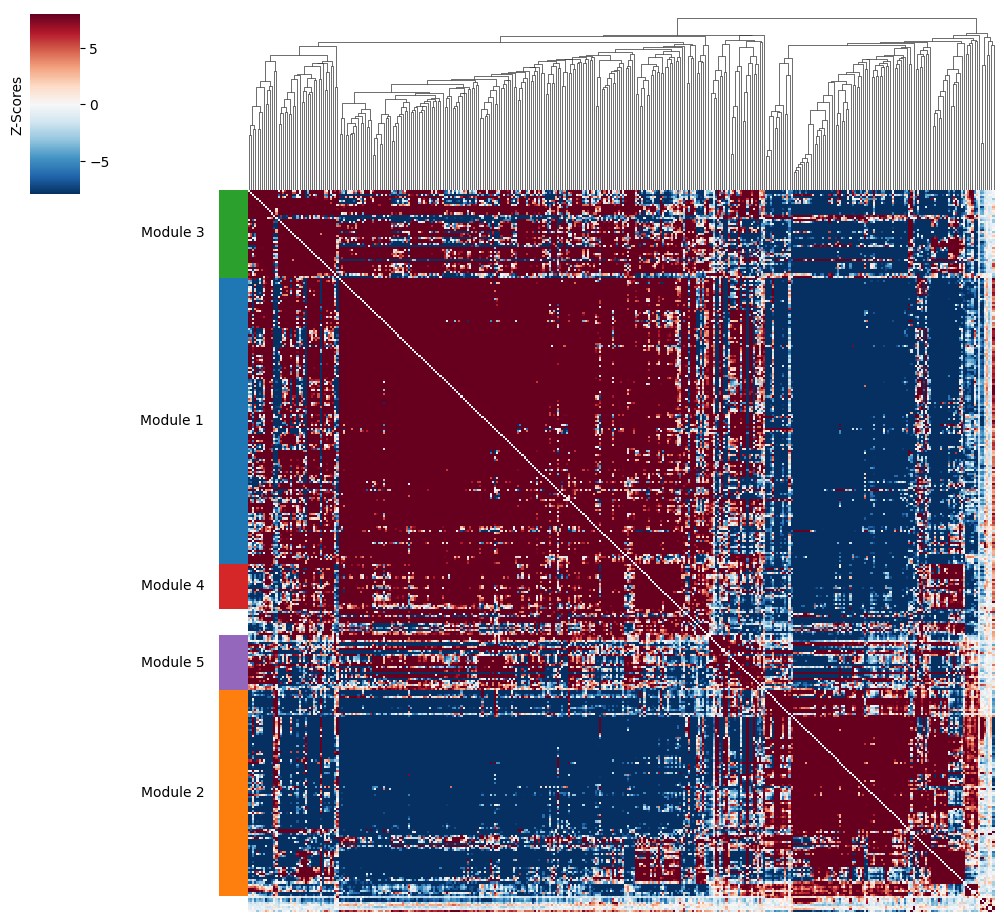

In [8]:
# Creating Modules
modules = hs.create_modules(
    min_gene_threshold=20, core_only=True, fdr_threshold=0.05
)
# Plot Local Correlations
plotLocalCorrelations = hs.plot_local_correlations()
plt.savefig('./output/LocalCorrelationsPlot.png')

In [9]:
hs.local_correlation_z

,TNC,AMBN,VIM,FABP7,CLIC1,HMGN3,TTYH1,HES1,ZFP36L1,GAS1,SLC9A3R1,OAF,TTR,AL049637.2,FAM89A,LEF1,DMRT3,CCND1,ADAMTSL1,MYO1E,ITGA2,ADAMTS18,AL627171.2,PLCE1,MIR222HG,LIMCH1,ID4,B3GAT2,ZNRF3,CACHD1,SIPA1L1,GPR39,LYPD6B,TENM4,RASGRP1,LHX2,DMRTA2,COL24A1,AL137139.2,AC023886.1,WNT7B,EGFR,AK5,GCHFR,KHDRBS3,TPBG,CTSC,DYRK4,NCALD,LGALS3BP,FILIP1,SCUBE1,MFSD3,C2orf81,CCDC85C,SCRG1,RCAN2,RCAN1,GRK5,CHST9,TRIM67,PROX1,PAUPAR,ZNF558,ARHGAP25,PCDHB5,DLK1,ZBTB16,DNAJC15,UNC5C,OLFM3,PRKG2,AC124854.1,RBMS1,AC093298.2,AC012409.2,RNF220,SFMBT2,RAB11FIP2,SORCS2,CARMIL1,TRAF3,AC109927.1,PLCL1,AC027288.3,MCM3AP,AL031985.4,AC108134.2,WDR49,RHBDF2,CHCHD2,LHX1,LHX5-AS1,LHX5,EOMES,LINC02609,SLC17A6,SST,GRIK3,SERTAD4,SEZ6,GAD1,RPP25,SP9,DLX6,FGD3,SHTN1,MGAT5B,SNTG1,ENOX1,ASTN1,TIAM1,AC034111.2,ENO4,BICDL1,GABRB3,SVOP,MTMR7,DCLK1,UNC79,LRRN3,SYT14,MTSS1,SRRM4,AFAP1,DOP1B,LINC00599,SCRT1,AC011900.1,KCNH7,SRGAP1,AC020611.2,IGSF9B,EPHB1,TNIK,NRXN1,POU2F2,RAB3C,SYT1,ASXL3,PAK5,SCN3A,APBA1,AKAP6,STXBP5L,DGKI,GNG12-AS1,ERBB4,KCNMB2,KCNMB2-AS1,KCNJ3,SH3RF3,KIRREL3,PCDH7,DSCAML1,KSR2,XKR4,CPEB3,SYT16,DNM3,CACNG2,CACNG8,SCN3B,MAPT,PHACTR3,NMNAT2,RUNX1T1,CNTN5,CNNM1,LRRC4C,AL445433.2,LHFPL3,SORCS3,RMST,AC019197.1,PLEKHA6,CAMKV,LINC02223,LRFN5,LHFPL4,ST18,INSM1,LZTS1-AS1,UBE2QL1,DLL3,LZTS1,ELAVL2,GNAO1,TAOK3,KIFAP3,REEP1,AMER2,CDK5R1,DPF1,TMEM35A,RIMKLA,HSPA12A,STMN2,ATP1A3,ACTL6B,INA,SCG3,RTN1,TTC9B,THRA,OCIAD2,PRKCZ,SEZ6L2,PDP1,TTC3,PRMT2,WSB2,GET1,PPP1R18,PARP6,ADGRG1,DYNC1I2,DPYSL2,EXOC5,GNG4,CCZ1,HSPA13,RRP1B,ATP5PF,CCT8,HMGN1,PFN2,RAB3IP,KIF21B,BSN,SEPTIN3,CRMP1,KLC1,CELSR3,KIF3C,GNG2,CD24,MLLT11,RTN2,GDAP1L1,NCAN,ACAP3,KIAA0408,MACO1,CEP170,MTMR6,CORO7,ELAVL4,ATCAY,ELAVL3,SOX4,MYT1,CORO2B,ARHGEF2,TMEM169,MAP1A,CXXC5,GTF2H2,NR2F1,ISOC2,HMGA1,EIF3L,RPL7L1,FAM92A,RNF7,ANAPC16,SINHCAF,GTPBP6,OARD1,EIF5A,IFI27L2,RPL12,EEF1B2,RPL18,RPS8,RPL5,RPLP0,RPL13,RPL18A,RPS3,RPL17,UBE2S,RND3,ARL4D,RORB,SOX5,TCF4,SYNE2,TMEM132D,UTY,AC012645.1,RABGAP1,GATAD2B,MYO9A,TOM1L2,SENP7,ZC4H2,HECTD4,HERC1,ANK2,SYNJ1,HGSNAT,DMXL2,INSR,ITSN1,ZNF532,CRYZL1,IPO9,PDE9A,TRIM2,FOXN3,PAXBP1,MORC3,ZNF704,DYRK1A,FAM110B,SP3,OLA1,SLC25A12,RNF180,AP001347.1,HLCS,KCNH8,DAPK1,AKT3,DST,SRGAP3,IQCK,PACRGL,REV3L,PKP4,PDE8A,ADGRB3,DYNC2H1,PLAGL1,ZBTB20-AS5,AC008438.1,GLCCI1,ZBTB20,SEC16A,AP000936.1,NIM1K,SUGP2,LSS,MCM3AP-AS1,APP,PKNOX1,BRWD1,SRPK2,IFNAR2,GART,DONSON,LINC02506,AL162493.1,GATD3A
TNC,0.000000,-4.897295,41.834264,40.067276,9.611113,23.209771,29.473488,14.201457,17.638416,7.405417,12.743619,11.399960,-0.519062,-4.359551,-3.798441,3.611631,-6.635855,-4.265737,5.395216,38.990027,17.657866,1.089482,-2.048092,39.649486,-0.420371,38.762621,23.635043,13.089790,18.799704,-1.733222,33.740427,1.266589,-1.241015,-9.168845,-8.759551,13.747079,-7.938469,-2.146483,-4.049479,1.720591,-7.828806,58.353563,32.750260,-3.190158,-15.644165,-4.998634,1.838201,1.273592,19.593148,1.319678,4.688563,-4.164810,-1.554983,-1.844777,-9.488870,55.397980,-4.645199,-4.567539,21.961282,-2.276259,-7.620713,-4.793269,3.551330,-7.133984,-2.888532,-4.904334,-6.469872,-15.077072,-5.997367,-11.054073,-10.179121,-8.038624,-5.203718,-8.330688,-2.843284,-9.703820,0.384536,-1.067366,-8.307920,-9.685713,-17.006625,-10.488724,-8.463195,-3.398065,-14.473273,9.775404,-1.364193,-1.856732,-7.134232,-1.215395,-19.288892,-7.762431,-8.829952,-9.169354,-8.702338,-15.008291,-17.849389,-3.754162,-15.770971,-11.521941,-14.668810,-20.860156,-5.740867,-12.483281,-15.816366,5.132707,4.665110,-7.436183,23.104064,-14.484700,-9.908639,-22.798647,-5.153944,14.149608,-22.205887,-25.706183,-26.629330,-24.215544,-23.205298,-30.179487,-7.897148,-16.241701,-19.175028,-25.624791,-19.628530,-11.000825,-21.990631,-15.642129,31.416327,54.981113,37.688665,30.860329,0.950500,-1.576177,26.591514,15.038548,-24.901431,-13.774515,-37.028530,-20.466570,-26.755501,-23.222438,-6.673293,-19.718500,-13.024942,-9.392324,-12.526858,-17.022101,-9.678409,-9.384750,-12.452356,4.998383,-17.194531,-24.160312,-28.840504,-18.358261,-27.577594,-24.424836,-18.135694,-20.520127,-17.3

## Gene Set Enrichment Analysis on Modules

In [10]:
modules = modules[~modules.index.duplicated(keep="first")]
modules

TNC           2
AMBN          2
VIM           2
FABP7         2
CLIC1         2
             ..
GART         -1
DONSON       -1
LINC02506    -1
AL162493.1    1
GATD3A        4
Name: Module, Length: 355, dtype: int64

In [11]:
modules.max()

5

In [12]:
modulesGeneDict = modules.to_dict()
modulesGeneDict

{'TNC': 2,
 'AMBN': 2,
 'VIM': 2,
 'FABP7': 2,
 'CLIC1': 2,
 'HMGN3': 2,
 'TTYH1': 2,
 'HES1': 2,
 'ZFP36L1': 2,
 'GAS1': 2,
 'SLC9A3R1': 2,
 'OAF': 2,
 'TTR': -1,
 'AL049637.2': 2,
 'FAM89A': 2,
 'LEF1': 2,
 'DMRT3': 2,
 'CCND1': 2,
 'ADAMTSL1': 2,
 'MYO1E': 2,
 'ITGA2': 2,
 'ADAMTS18': 2,
 'AL627171.2': -1,
 'PLCE1': 2,
 'MIR222HG': 2,
 'LIMCH1': 2,
 'ID4': 2,
 'B3GAT2': 2,
 'ZNRF3': 2,
 'CACHD1': 2,
 'SIPA1L1': 2,
 'GPR39': 5,
 'LYPD6B': 2,
 'TENM4': 2,
 'RASGRP1': 5,
 'LHX2': 5,
 'DMRTA2': 2,
 'COL24A1': 2,
 'AL137139.2': 2,
 'AC023886.1': 2,
 'WNT7B': 2,
 'EGFR': 2,
 'AK5': 2,
 'GCHFR': 2,
 'KHDRBS3': 5,
 'TPBG': 2,
 'CTSC': 2,
 'DYRK4': 2,
 'NCALD': 2,
 'LGALS3BP': 2,
 'FILIP1': 2,
 'SCUBE1': 5,
 'MFSD3': 2,
 'C2orf81': 2,
 'CCDC85C': 2,
 'SCRG1': 2,
 'RCAN2': 5,
 'RCAN1': 1,
 'GRK5': 4,
 'CHST9': 2,
 'TRIM67': 2,
 'PROX1': 3,
 'PAUPAR': 5,
 'ZNF558': 2,
 'ARHGAP25': 2,
 'PCDHB5': 2,
 'DLK1': 3,
 'ZBTB16': 3,
 'DNAJC15': 2,
 'UNC5C': 5,
 'OLFM3': 2,
 'PRKG2': 5,
 'AC124854.1': 5,

In [13]:
modulesHSA21Dictionary = {}
for i in range(1, modules.max()+1):
    modulesHSA21Dictionary[i] = []
modulesHSA21Dictionary

{1: [], 2: [], 3: [], 4: [], 5: []}

In [14]:
for gene in significantHSA21genes:
    moduleGene = modulesGeneDict[gene]
    if moduleGene != -1:
        modulesHSA21Dictionary[moduleGene].append(gene)
modulesHSA21Dictionary

{1: ['RCAN1',
  'TIAM1',
  'DOP1B',
  'TTC3',
  'PRMT2',
  'GET1',
  'CCT8',
  'SYNJ1',
  'ITSN1',
  'CRYZL1',
  'PDE9A',
  'MORC3',
  'DYRK1A',
  'BRWD1'],
 2: [],
 3: [],
 4: ['MCM3AP', 'PAXBP1', 'HLCS', 'LSS', 'APP', 'PKNOX1', 'GATD3A'],
 5: []}

In [15]:
hs.results = hs.results.loc[list(modules.index)]
hs.results

,C,Z,Pval,FDR
Gene,,,,
TNC,0.448509,426.269747,0.0,0.0
AMBN,0.432499,347.915601,0.0,0.0
VIM,0.767246,625.609799,0.0,0.0
FABP7,0.555367,438.858186,0.0,0.0
CLIC1,0.344355,256.858231,0.0,0.0
...,...,...,...,...
GART,0.061904,52.976854,0.0,0.0
DONSON,0.100818,82.271520,0.0,0.0
LINC02506,0.074173,77.454797,0.0,0.0


In [16]:
# Convert Modules into Pandas Dataframe
modulesDataframe = pd.DataFrame(modules)
modulesDataframe["Z"] = hs.results["Z"].tolist()
modulesDataframe = modulesDataframe[modulesDataframe["Module"] != -1]
maximumModule = max(list(modulesDataframe["Module"]))

# Generate Gene Set Enrichment Analysis
for i in range(1, maximumModule+1):
    moduleRank = modulesDataframe[modulesDataframe["Module"] == i]
    moduleRank = moduleRank.rename_axis("Gene").reset_index()
    ranking = moduleRank[['Gene', 'Z']]
    rankingGenes = list(moduleRank["Gene"])

    results = GOAnalysis.geneOntologyAnalysis(rankingGenes)
    results.to_csv("./output/GSEA_Module_"+str(i)+".csv")
    print(results)

    # pre_res = gp.prerank(rnk = ranking, gene_sets = 'GO_Biological_Process_2021', min_size=10, seed = 6, permutation_num = 100)
    # out = []
    # for term in list(pre_res.results):
    #     out.append([term,
    #             pre_res.results[term]['fdr'],
    #             pre_res.results[term]['es'],
    #             pre_res.results[term]['nes']])

    # out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
    # out_df = out_df[out_df["fdr"] < 0.05]
    # out_df.to_csv("./output/GSEA_Module_"+str(i)+".csv")

  EXISTS: gene2go
/Users/greencode/Documents/Coding/Analysis-of-scRNA-Sequencing-Data/modules/GO/go-basic.obo: fmt(1.2) rel(2022-11-03) 46,800 Terms
HMS:0:00:02.481690 339,664 annotations, 20,697 genes, 19,000 GOs, 1 taxids READ: gene2go 

Load BP Ontology Enrichment Analysis ...
 82% 16,797 of 20,605 population items found in association

Load CC Ontology Enrichment Analysis ...
 86% 17,762 of 20,605 population items found in association

Load MF Ontology Enrichment Analysis ...
 85% 17,521 of 20,605 population items found in association
input genes: 141
mapped genes: 133
[1827, 55604, 5334, 6750, 2899, 56256, 124925, 2571, 54913, 1750, 146664, 55068, 460, 7074, 92558, 2562, 55530, 9108, 9201, 57578, 54674, 255928, 9788, 9980, 83482, 22997, 2047, 9378, 5452, 115827, 6857, 80816, 57144, 6328, 320, 9472, 9515, 9162, 2066, 3760, 344558, 84623, 5099, 57453, 283455, 114786, 22849, 83851, 26052, 10369, 59283, 55800, 4137, 116154, 23057, 862, 57689, 375612, 22874, 79012, 145581, 375323, 2775

In [17]:
results

,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,GO:0021937,cerebellar Purkinje cell-granule cell precurso...,biological_process,8.055675e-07,0.010066,2,19,2,"[LHX5, LHX1]"


In [18]:
pd.read_csv("./output/GSEA_Module_7.csv")

,Unnamed: 0,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,0,GO:0004905,type I interferon receptor activity,molecular_function,0.000003,0.012798,2,35,2,"['IFNAR1', 'IFNAR2']"


In [19]:
# Set List of Prefered GO Terms
selectedTerms = [0,1,0,0,0,0,0]

## Visualizing Module Expression UMAP

In [20]:
# Calculating Module Scores
module_scores = hs.calculate_module_scores()

Computing scores for 5 modules...


100%|██████████| 5/5 [00:25<00:00,  5.07s/it]


In [21]:
module_scores

,1,2,3,4,5
CON_DS2U_AAACCCACACATATGC-1-0-0-0-0,2.710853,-2.382128,-0.472045,0.508170,-0.120111
CON_DS2U_AAACCCACAGCGGATA-1-0-0-0-0,-6.260300,4.820883,-1.856297,-1.321834,-0.540663
CON_DS2U_AAACCCAGTATTCCGA-1-0-0-0-0,3.317941,-1.778573,-0.729828,0.844097,-0.462884
CON_DS2U_AAACCCATCCGTGACG-1-0-0-0-0,-6.647701,2.594043,-0.894496,-2.417550,-1.013191
CON_DS2U_AAACGAAAGCGTGAAC-1-0-0-0-0,-7.004465,6.690007,-2.200134,-2.124252,-0.966988
...,...,...,...,...,...
DS_DSP_TTTGGTTTCCTATTTG-1-1,6.400775,-3.156378,1.867809,-0.451967,0.292618
DS_DSP_TTTGGTTTCCTCGCAT-1-1,6.482203,-3.295889,0.230153,0.426524,1.034791
DS_DSP_TTTGGTTTCTGCGATA-1-1,3.533418,-2.573382,-0.708290,1.024494,2.956184
DS_DSP_TTTGTTGAGCCTTTCC-1-1,-4.339155,3.458746,-0.584571,-2.007038,-0.980351


In [3]:
def pp(adataFile):
    inputDataAdata = adataFile
    adata = sc.read(inputDataAdata)
    adata.var_names_make_unique()
    adata.X = adata.X.astype('float64')
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    riboURL = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
    riboGenes = pd.read_table(riboURL, skiprows=2, header = None)
    adata.var['ribo'] = adata.var_names.isin(riboGenes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', "ribo"], percent_top=None, log1p=False, inplace=True)
    sc.pp.filter_genes(adata, min_counts=3)
    sc.pp.normalize_total(adata, target_sum=10000)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40) # n_neighbors=15 is default
    sc.tl.umap(adata)
    sc.external.pp.bbknn(adata, batch_key='sample')
    # Plotting UMAP after integration
    sc.tl.umap(adata)
    return adata
adata = pp("../output/savedDataClustersFinal.h5ad")

/var/folders/ts/m7c_798d70q3whk59gstkgz00000gn/T/ipykernel_4664/1884668711.py:17: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])


In [ ]:
adata

In [ ]:
modulesDictionary = {}
for i in range(1, maximumModule+1):
    modulesDictionary[i] = 'module'+str(i)
modulesDictionary

In [ ]:
if(list(adata.obs.index) == list(module_scores.index)):
    pdConcat = pd.concat([adata.obs,module_scores], axis=1, ignore_index=False)

pdConcat = pdConcat.rename(columns=modulesDictionary)
pdConcat

In [ ]:
adata.obs = pdConcat

In [ ]:
adata.obs

In [ ]:
sc.pl.umap(adata, color=list(modulesDictionary.values()))

In [ ]:
adataCON = adata[adata.obs["group"] == "CON"]
sc.pl.umap(adataCON, color=list(modulesDictionary.values()))

In [ ]:
adataDS = adata[adata.obs["group"] == "DS"]
sc.pl.umap(adataDS, color=list(modulesDictionary.values()))

In [ ]:
goRenameDictionary = {}
for i in range(1, maximumModule+1):
    fileName = pd.read_csv("./output/GSEA_Module_"+str(i)+".csv")
    if(len(fileName.index)!=0):
        goTerm = fileName["term"][selectedTerms[i-1]]
    else:
        goTerm = "NO SIGNIFICANT GO TERM"+str(i)
    goRenameDictionary['module'+str(i)] = goTerm
goRenameDictionary

In [ ]:
renamedAdata = adata
renamedAdata.obs = renamedAdata.obs.rename(columns=goRenameDictionary)
renamedAdata.obs

In [ ]:
list(goRenameDictionary.values())

In [ ]:
sc.pl.umap(renamedAdata, color=list(goRenameDictionary.values()))